<a href="https://colab.research.google.com/github/Navanithapatel/GEN-AI-workshop/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv("Customer Purchase.csv")
print(df.head())
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Purchase"] = df["Purchase"].map({"YES": 1, "NO": 0})
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

   Gender  Monthly Income  Brand Awareness  Quality Rating Purchase
0    Male           28000                1               2       NO
1  Female           30000                2               3       NO
2    Male           32000                2               2       NO
3  Female           35000                3               3       NO
4    Male           37000                3               4      YES

Missing Values:
 Gender             0
Monthly Income     0
Brand Awareness    0
Quality Rating     0
Purchase           0
dtype: int64

Basic Statistics:
           Gender  Monthly Income  Brand Awareness  Quality Rating   Purchase
count  80.000000       80.000000        80.000000       80.000000  80.000000
mean    0.500000    51787.500000         4.025000        4.225000   0.800000
std     0.503155    13156.019703         1.211496        1.030853   0.402524
min     0.000000    28000.000000         1.000000        1.000000   0.000000
25%     0.000000    40750.000000         3.000000  

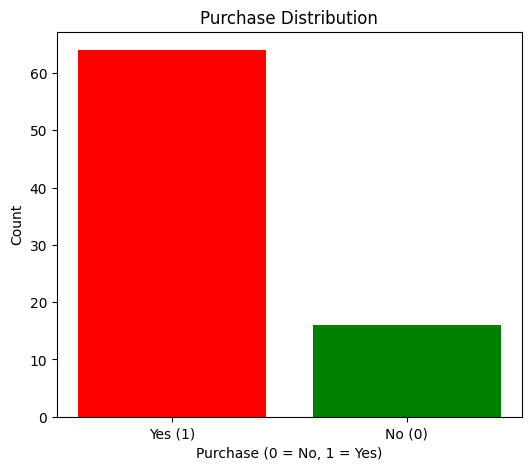

In [15]:


#  Bar Chart of Purchase Distribution
purchase_counts = df["Purchase"].value_counts()
plt.figure(figsize=(6, 5))
plt.bar(purchase_counts.index.astype(str), purchase_counts.values, color=['red', 'green'])
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Purchase Distribution")
# Setting clear labels for the x-axis
plt.xticks(['0', '1'], ['No (0)', 'Yes (1)'])
plt.show()



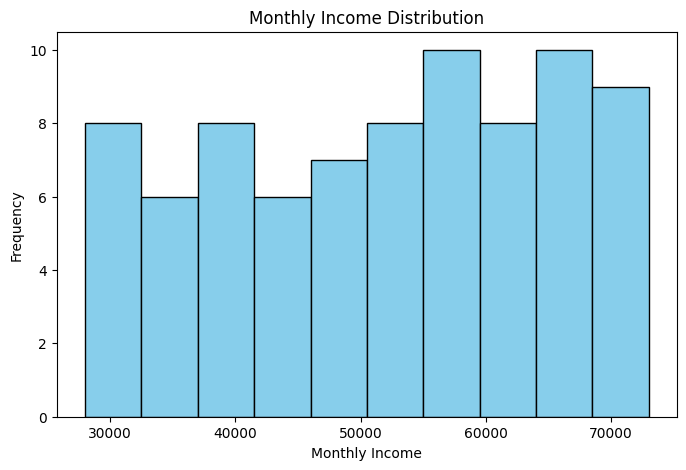

In [13]:
import matplotlib.pyplot as plt

#  Histogram
plt.figure(figsize=(8, 5))
plt.hist(df["Monthly Income"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")
plt.show()

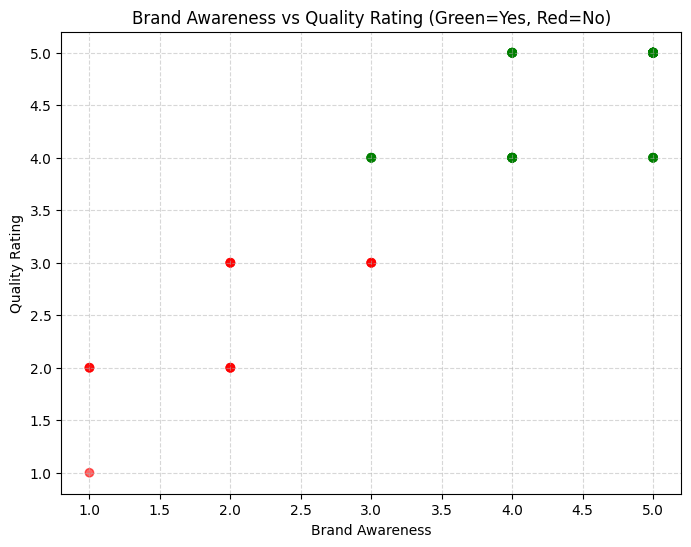

In [16]:
#Scatterplot Brand Awareness vs Quality
colors = df["Purchase"].map({1: "green", 0: "red"})

plt.figure(figsize=(8, 6))
plt.scatter(df["Brand Awareness"], df["Quality Rating"], c=colors, alpha=0.6)
plt.xlabel("Brand Awareness")
plt.ylabel("Quality Rating")
plt.title("Brand Awareness vs Quality Rating (Green=Yes, Red=No)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("Purchase", axis=1)
y = df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9375

Confusion Matrix:
 [[ 2  0]
 [ 1 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.93      0.96        14

    accuracy                           0.94        16
   macro avg       0.83      0.96      0.88        16
weighted avg       0.96      0.94      0.94        16



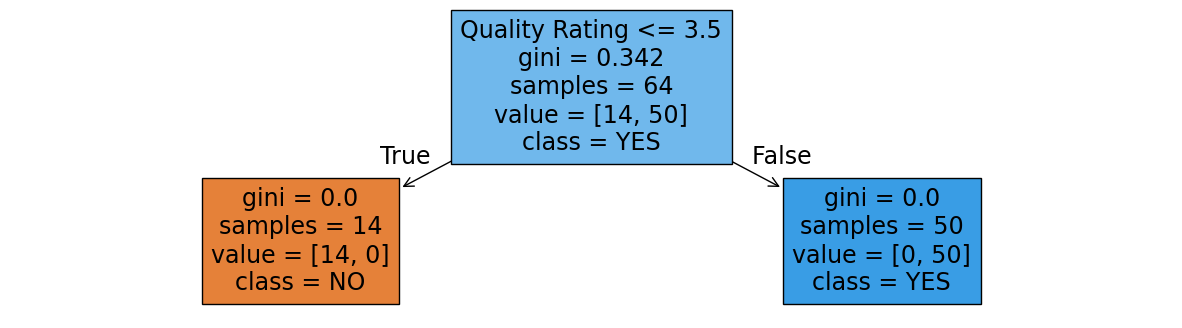

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(15, 4))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["NO", "YES"],
    filled=True
)
plt.show()

In [17]:
print(df)

    Gender  Monthly Income  Brand Awareness  Quality Rating  Purchase
0        1           28000                1               2         0
1        0           30000                2               3         0
2        1           32000                2               2         0
3        0           35000                3               3         0
4        1           37000                3               4         1
..     ...             ...              ...             ...       ...
75       0           65000                5               5         1
76       1           67000                5               5         1
77       0           69000                5               5         1
78       1           71000                5               5         1
79       0           73000                5               5         1

[80 rows x 5 columns]
